In [2]:

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd


/Users/juntingdeng/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


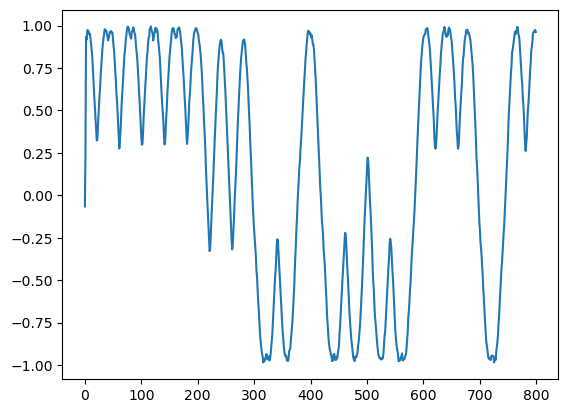

In [10]:

PATH="../TcasRFFData/"
dataFile="ChipCAIRprocessedType3BlockOS20len800comb220V1p2Quant16.npz"

file = np.load(PATH+dataFile)
items = file.files
datasets, targets = file[items[0]], file[items[1]]

plt.plot(datasets[1123,0,:])

In [3]:
dic = np.load("./sim/rawData/processedData/dataset.npy", allow_pickle=True)
datasets, targets = dic.item().get("outSignals"), dic.item().get("labels")

input = np.load("./RFF-RL/sim/rawData/processedData/InputSig.npy", allow_pickle=True)
input = input.T
input = input[0,:] + 1j*input[1,:]
print("dataset shape: ", datasets.shape)
print("labels shape: ", targets.shape)
print("input shape: ", input.shape)


FileNotFoundError: [Errno 2] No such file or directory: './sim/rawData/processedData/dataset.npy'

In [5]:
# Enable elements
enable=1
enables=[enable]*12
configs=[]
for i in range(12):
    enables[i]=0
    for j in range(i+1, 12):
        enables[j]=0
        for k in range(j+1, 12):
            enables[k]=0
            configs.append(enables[:])
            enables[k]=enable
        enables[j]=enable
    enables[i]=enable
print(len(configs))

220


In [6]:
labels = []
for i in range(len(targets)):
    cfg = targets[i]
    labels.append(configs.index(list(cfg)))
print("labels len: ", len(labels))
print("labels: ", labels)

labels len:  2200
labels:  [60, 62, 64, 0, 1, 0, 1, 63, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 2, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214

In [15]:
# datasets, labels = outtopk.reshape((outtopk.shape[0], -1)), labeltopk
# datasets, labels = outtopk, labeltopk

from sklearn.decomposition import PCA

compsig = datasets[:,0,:]+1j*datasets[:,1,:]
compsigNorm = compsig/np.mean(np.abs(compsig))
fft = abs(np.fft.fftshift(np.fft.fft(compsigNorm)))
fftangle = np.angle(np.fft.fftshift(np.fft.fft(compsigNorm)))
sigangle = np.angle(compsigNorm/input)
# for i in range(compsigNorm.shape[0]):
#     sigangle[i] = np.angle(compsigNorm[i]/input)

print("fft: ", fft.shape)
print("fftangle: ", fftangle.shape)
print("sigangle: ", sigangle.shape)

pca = PCA(n_components=5)

fft_pca =  pca.fit_transform(fft)
print("pca fft explained_variance_ratio_: ", pca.explained_variance_ratio_)

fftangle_pca = pca.fit_transform(fftangle)
print("pca fftangle explained_variance_ratio_: ", pca.explained_variance_ratio_)

sigangle_pca = pca.fit_transform(sigangle)
print("pca sigangle explained_variance_ratio_: ", pca.explained_variance_ratio_)

print("fft_pca: ", fft_pca.shape)
print("fftangle_pca: ", fftangle_pca.shape)
print("sigangle_pca: ", sigangle_pca.shape)



fft:  (2200, 800)
fftangle:  (2200, 800)
sigangle:  (2200, 800)
pca fft explained_variance_ratio_:  [0.962479   0.02502061 0.00336683 0.00240309 0.00206629]
pca fftangle explained_variance_ratio_:  [9.96553754e-01 1.85452962e-03 6.90431200e-04 3.22394582e-04
 2.41644228e-04]
pca sigangle explained_variance_ratio_:  [9.96447489e-01 1.15488339e-03 5.68259184e-04 4.52709619e-04
 3.34676778e-04]
fft_pca:  (2200, 5)
fftangle_pca:  (2200, 5)
sigangle_pca:  (2200, 5)


resultfft_pca size:  (2200, 2)
resultfftangle_pca size:  (2200, 2)
resultsigangle size:  (2200, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


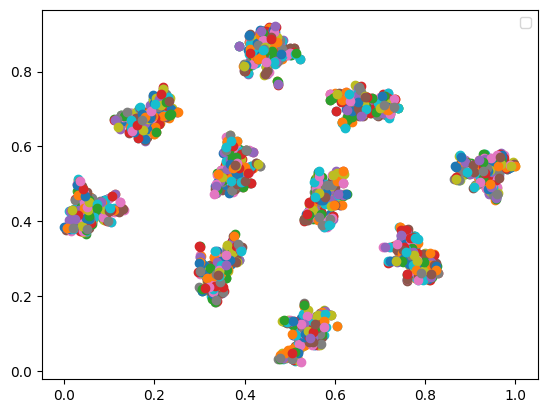

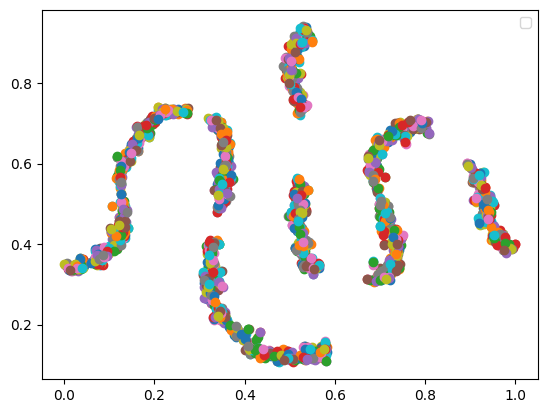

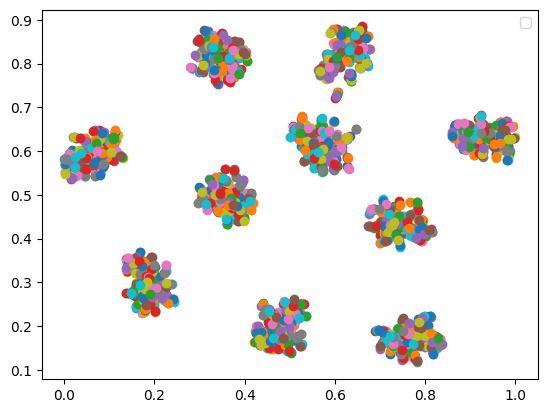

In [20]:
# plot pca-tsne result
tsne2D = TSNE(n_components=2, perplexity=20, init="pca", metric="l2",random_state=0, n_iter=10000)

# fft_pca 
resultfft_pca = tsne2D.fit_transform(fft_pca)
resultfft_pca = (resultfft_pca-np.min(resultfft_pca))/(np.max(resultfft_pca)-np.min(resultfft_pca))
print("resultfft_pca size: ", resultfft_pca.shape)
# print("result: ", result)

# fftangle_pca 
resultfftangle_pca = tsne2D.fit_transform(fftangle_pca)
resultfftangle_pca = (resultfftangle_pca-np.min(resultfftangle_pca))/(np.max(resultfftangle_pca)-np.min(resultfftangle_pca))
print("resultfftangle_pca size: ", resultfftangle_pca.shape)
# print("result: ", result)

# sigangle_pca 
resultsigangle_pca = tsne2D.fit_transform(sigangle_pca)
resultsigangle_pca = (resultsigangle_pca-np.min(resultsigangle_pca))/(np.max(resultsigangle_pca)-np.min(resultsigangle_pca))
print("resultsigangle size: ", resultsigangle_pca.shape)
# print("result: ", result)


# fft 
fig, ax = plt.subplots()
groupsfft = pd.DataFrame(resultfft_pca, columns=['x', 'y']).assign(category=labels).groupby('category')
for name, points in groupsfft:
    ax.scatter(points.x, points.y)
ax.legend()

# fftangle 
fig, ax = plt.subplots()
groupsfftangle = pd.DataFrame(resultfftangle_pca, columns=['x', 'y']).assign(category=labels).groupby('category')
for name, points in groupsfftangle:
    ax.scatter(points.x, points.y)
ax.legend()

# sigangle 
fig, ax = plt.subplots()
groups = pd.DataFrame(resultsigangle_pca, columns=['x', 'y']).assign(category=labels).groupby('category')
for name, points in groups:
    ax.scatter(points.x, points.y)
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


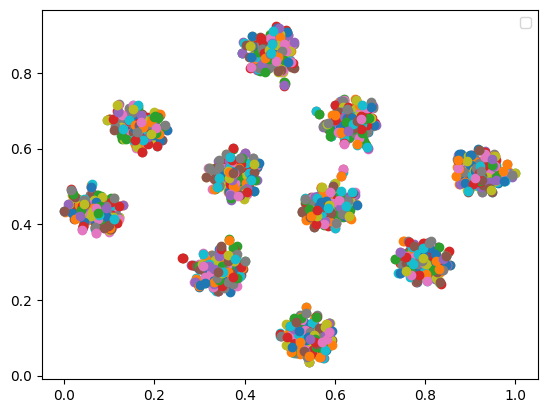

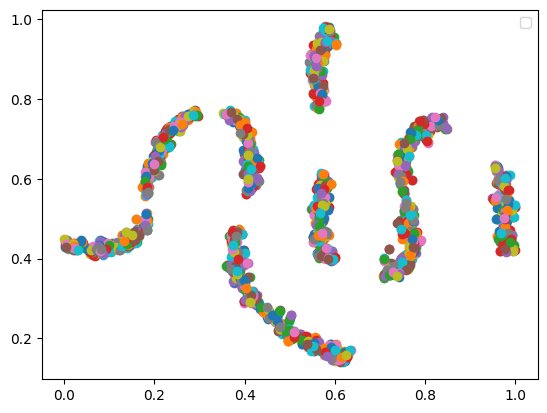

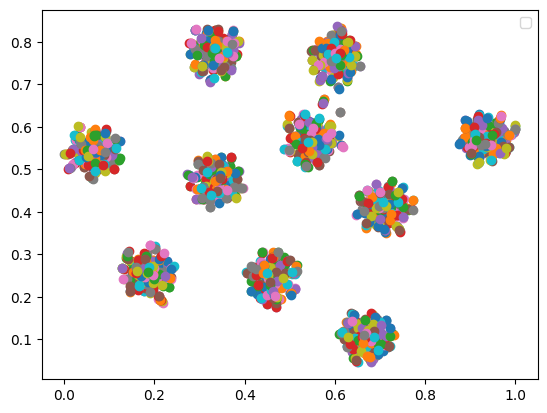

In [7]:
# plot tsne result

# fft 
resultfft = tsne2D.fit_transform(fft)
resultfft = (resultfft-np.min(resultfft))/(np.max(resultfft)-np.min(resultfft))
print("resultfft size: ", resultfft.shape)
# print("result: ", result)

# fftangle 
resultfftangle = tsne2D.fit_transform(fftangle)
resultfftangle = (resultfftangle-np.min(resultfftangle))/(np.max(resultfftangle)-np.min(resultfftangle))
print("resultfftangle size: ", resultfftangle.shape)
# print("result: ", result)

# sigangle 
resultsigangle = tsne2D.fit_transform(sigangle)
resultsigangle = (resultsigangle-np.min(resultsigangle))/(np.max(resultsigangle)-np.min(resultsigangle))
print("resultsigangle size: ", resultsigangle.shape)
# print("result: ", result)


# fft 
fig, ax = plt.subplots()
groupsfft = pd.DataFrame(resultfft, columns=['x', 'y']).assign(category=labels).groupby('category')
for name, points in groupsfft:
    ax.scatter(points.x, points.y)
ax.legend()

# fftangle 
fig, ax = plt.subplots()
groupsfftangle = pd.DataFrame(resultfftangle, columns=['x', 'y']).assign(category=labels).groupby('category')
for name, points in groupsfftangle:
    ax.scatter(points.x, points.y)
ax.legend()

# sigangle 
fig, ax = plt.subplots()
groups = pd.DataFrame(resultsigangle, columns=['x', 'y']).assign(category=labels).groupby('category')
for name, points in groups:
    ax.scatter(points.x, points.y)
ax.legend()

labels:  (2200,)
centers:  [[0.50554866 0.7630212 ]
 [0.11924183 0.38935146]
 [0.8916812  0.52374154]
 [0.41605306 0.25490475]
 [0.63805836 0.44992396]
 [0.27499148 0.6196546 ]]


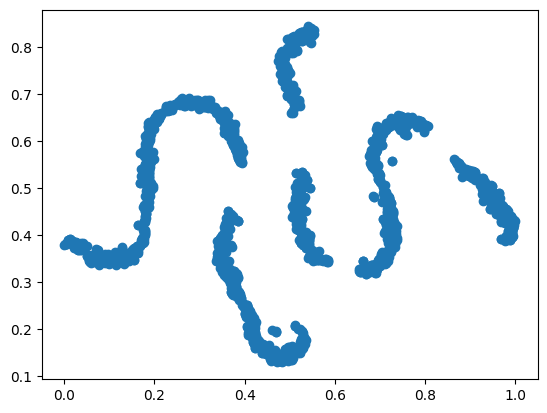

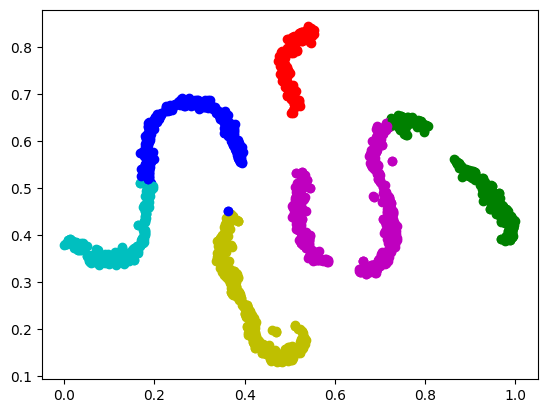

In [133]:
from sklearn.cluster import KMeans
result=resultfftangle
k=6
kmeans = KMeans(n_clusters=k, random_state=0, max_iter=20000, n_init="auto").fit(result)
fig, ax = plt.subplots()
ax.scatter(result[:,0], result[:,1])

clusters=[[] for _ in range(k)]
kmeans_label = [[] for _ in range(k)]

print("labels: ", (kmeans.labels_.shape))
print("centers: ", kmeans.cluster_centers_)

for i in range(result.shape[0]):
    cluster = kmeans.labels_[i]
    # print('k: ',cluster)
    clusters[cluster].append(list(result[i]))
    kmeans_label[cluster].append(labels[i])

colors = ['r', 'c', 'g', 'y', 'm', 'b', 'k', 'violet', 'coral', 'olive']

fig, ax = plt.subplots()
for i in range(result.shape[0]):
    k = kmeans.labels_[i]
    ax.scatter(result[i][0], result[i][1], c=colors[k])

In [132]:
for i in range(10):
    print(i)    
    print(len(kmeans_label[i]))

0
216
1
282
2
325
3
432
4
568
5
377
6


IndexError: list index out of range

In [ ]:
for name, points in groups:
    print("name: ", name)
    print("points: ", points)